In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.applications.xception import Xception
#from keras.applications.InceptionResNetV2 import InceptionResNetV2
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
from keras.models import Model
import keras
from keras.optimizers import Adam

In [2]:
IMAGE_SIZE = 224
pretrained_model =applications.Xception(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [22]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'imagesdata/train',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical')


Found 1853 images belonging to 2 classes.


In [7]:
validation_generator = test_dataset.flow_from_directory(
    'imagesdata/test',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 241 images belonging to 2 classes.


In [23]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=241//32
)


Epoch 1/10
4/4 [==============================] - 278s 70s/step - loss: 1.9866 - accuracy: 0.7656 - val_loss: 1.8753 - val_accuracy: 0.3884
Epoch 2/10
4/4 [==============================] - 218s 55s/step - loss: 1.9728 - accuracy: 0.8047 - val_loss: 4.7394 - val_accuracy: 0.5885
Epoch 3/10
4/4 [==============================] - 242s 61s/step - loss: 1.6772 - accuracy: 0.8203 - val_loss: 4.1881 - val_accuracy: 0.6124
Epoch 4/10
4/4 [==============================] - 286s 72s/step - loss: 2.5765 - accuracy: 0.7656 - val_loss: 14.9079 - val_accuracy: 0.3876
Epoch 5/10
4/4 [==============================] - 269s 67s/step - loss: 1.4770 - accuracy: 0.8750 - val_loss: 2.5771 - val_accuracy: 0.5742
Epoch 6/10
4/4 [==============================] - 302s 75s/step - loss: 1.0169 - accuracy: 0.8320 - val_loss: 1.5292 - val_accuracy: 0.5407
Epoch 7/10
4/4 [==============================] - 266s 66s/step - loss: 0.7953 - accuracy: 0.8672 - val_loss: 1.9404 - val_accuracy: 0.5359
Epoch 8/10
4/4 [===

**Model Image**

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='77-xceptionv.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [24]:
model.save("Xception-77_model.h5")

**Model Summary**

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 409602    
Total params: 21,271,082
Trainable params: 409,602
Non-trainable params: 20,861,480
_________________________________________________________________


**Accuracy and Loss Graph**

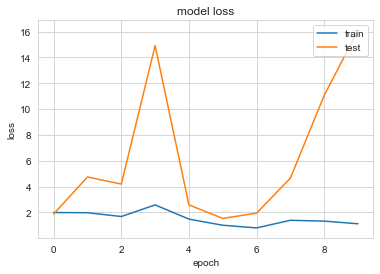

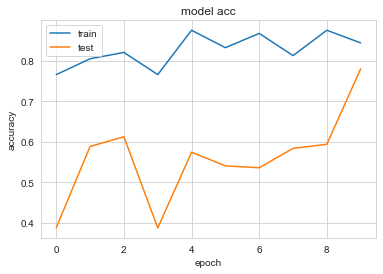

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cf = confusion_matrix(true_classes,pred)
cf


array([[157,  12],
       [ 63,   9]], dtype=int64)

**Confusion Matrix Image**

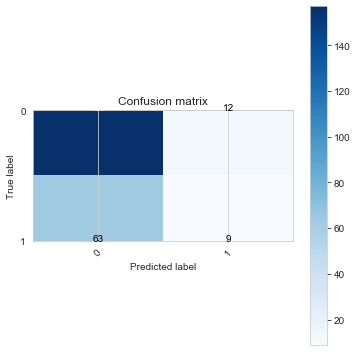

In [29]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [30]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       169
           1       0.43      0.12      0.19        72

    accuracy                           0.69       241
   macro avg       0.57      0.53      0.50       241
weighted avg       0.63      0.69      0.62       241

